 # CIND-820 - Final project - BRFSS 2020 Survey Data

## 1) Data Analysis; summarizing and visualizind data

### 1.1) Importing necessary libraries

In [ ]:
!pip install jupyter notebook
!pip install scikit-learn
!pip install seaborn
!pip install pandas
!pip install matplotlib
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2) Upload Dataset

In [4]:
df = pd.read_csv("E:\\Chang_school_cources\\CIND820\\dataset\\BRFSS2020.csv")
df.shape

(401958, 279)

### 1.3) Select Important Features according the papers

In [5]:
column_name=[
    '_SEX',
    '_BMI5CAT',
    '_AGE80',
    '_SMOKER3',
    'EXERANY2',
    '_TOTINDA',
    'SLEPTIM1',
    'DIABETE4',
    'CVDINFR4',
    'CVDCRHD4',
    '_URBSTAT',
    '_RFBING5',
    '_RFDRHV7',
    'CVDSTRK3',
    '_PHYS14D',
    'CHCKDNY2' ,
    '_LTASTH1',
    'GENHLTH' ,
    'DIFFWALK',
    'CHCSCNCR' ,
    'ADDEPEV3'
    #'ECIGARET'

]

df=df[column_name]
df.rename(columns={
    '_SEX': 'sex',
    '_BMI5CAT': 'bmi',
    '_AGE80': 'age_groups',
    '_SMOKER3': 'smoke_status',
    'EXERANY2': 'exercise1',
    '_TOTINDA': 'exercise2',
    'SLEPTIM1': 'sleep',
    'DIABETE4': 'diabete',
    'CVDINFR4': 'heart_disease1',
    'CVDCRHD4': 'heart_disease2',
    '_URBSTAT': 'area' ,
    '_RFBING5':  'drinker1',
    '_RFDRHV7': 'drinker2',
    'CVDSTRK3': 'stroke',
    '_PHYS14D' : 'Physical_Health',
    'CHCKDNY2' :'Kidney_Disease',
    '_LTASTH1' :'Asthma',
    'GENHLTH' : 'General_health',
    'DIFFWALK' : 'Difficulty_Walking',
    'CHCSCNCR' : 'Skin_Cancer',
    'ADDEPEV3' : 'depressive_disorder'
    #'ECIGARET' : 'Ecigarette'

}, inplace=True)



In [18]:
df.head()

,sex,bmi,age_groups,smoke_status,exercise1,exercise2,sleep,diabete,heart_disease1,heart_disease2,...,drinker1,drinker2,stroke,Physical_Health,Kidney_Disease,Asthma,General_health,Difficulty_Walking,Skin_Cancer,depressive_disorder
0,2,1.0,56,1,1.0,1,5.0,1.0,2.0,2.0,...,1,1,2.0,2,2.0,2,2.0,2.0,1.0,1.0
1,2,3.0,65,9,1.0,1,7.0,3.0,2.0,2.0,...,9,9,2.0,1,2.0,2,3.0,2.0,2.0,1.0
2,2,NaN,65,4,1.0,1,7.0,3.0,2.0,2.0,...,1,1,2.0,1,2.0,1,3.0,2.0,2.0,2.0
3,2,NaN,80,4,2.0,2,6.0,3.0,2.0,2.0,...,1,1,2.0,1,2.0,1,1.0,2.0,2.0,2.0
4,2,2.0,80,4,1.0,1,7.0,3.0,2.0,2.0,...,1,1,1.0,1,2.0,1,2.0,2.0,2.0,2.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  401958 non-null  int64  
 1   bmi                  360601 non-null  float64
 2   age_groups           401958 non-null  int64  
 3   smoke_status         401958 non-null  int64  
 4   exercise1            401955 non-null  float64
 5   exercise2            401958 non-null  int64  
 6   sleep                401955 non-null  float64
 7   diabete              401952 non-null  float64
 8   heart_disease1       401952 non-null  float64
 9   heart_disease2       401955 non-null  float64
 10  area                 394831 non-null  float64
 11  drinker1             401958 non-null  int64  
 12  drinker2             401958 non-null  int64  
 13  stroke               401955 non-null  float64
 14  Physical_Health      401958 non-null  int64  
 15  Kidney_Disease   

In [20]:
df.describe()

,sex,bmi,age_groups,smoke_status,exercise1,exercise2,sleep,diabete,heart_disease1,heart_disease2,...,drinker1,drinker2,stroke,Physical_Health,Kidney_Disease,Asthma,General_health,Difficulty_Walking,Skin_Cancer,depressive_disorder
count,401958.000000,360601.000000,401958.000000,401958.000000,401955.000000,401958.000000,401955.000000,401952.000000,401952.000000,401955.000000,...,401958.000000,401958.000000,401955.000000,401958.000000,401952.000000,401958.000000,401950.000000,386678.000000,401955.000000,401952.000000
mean,1.542412,2.981792,54.429221,3.648065,1.248593,1.250894,7.944698,2.763459,1.972783,1.986494,...,1.745538,1.670433,1.977167,1.565064,1.983040,1.161902,2.452947,1.873326,1.926703,1.840546
std,0.498199,0.831831,17.666723,1.563233,0.502215,0.531942,7.973949,0.735095,0.449373,0.530419,...,2.133129,2.120560,0.359852,1.292508,0.387724,0.571085,1.085778,0.507526,0.426623,0.575074
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,40.000000,3.000000,1.000000,1.000000,6.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,57.000000,4.000000,1.000000,1.000000,7.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,4.000000,69.000000,4.000000,1.000000,1.000000,8.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
max,2.000000,4.000000,80.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


## 2) Data preparation, including selecting, preprocessing, and transforming data

 ### 2.1) Dropping Duplicates

In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()
df.shape

Number of duplicate rows: 113832


(288126, 21)

### 2.2) Detecting and Removeing the irrelevant values and outliers

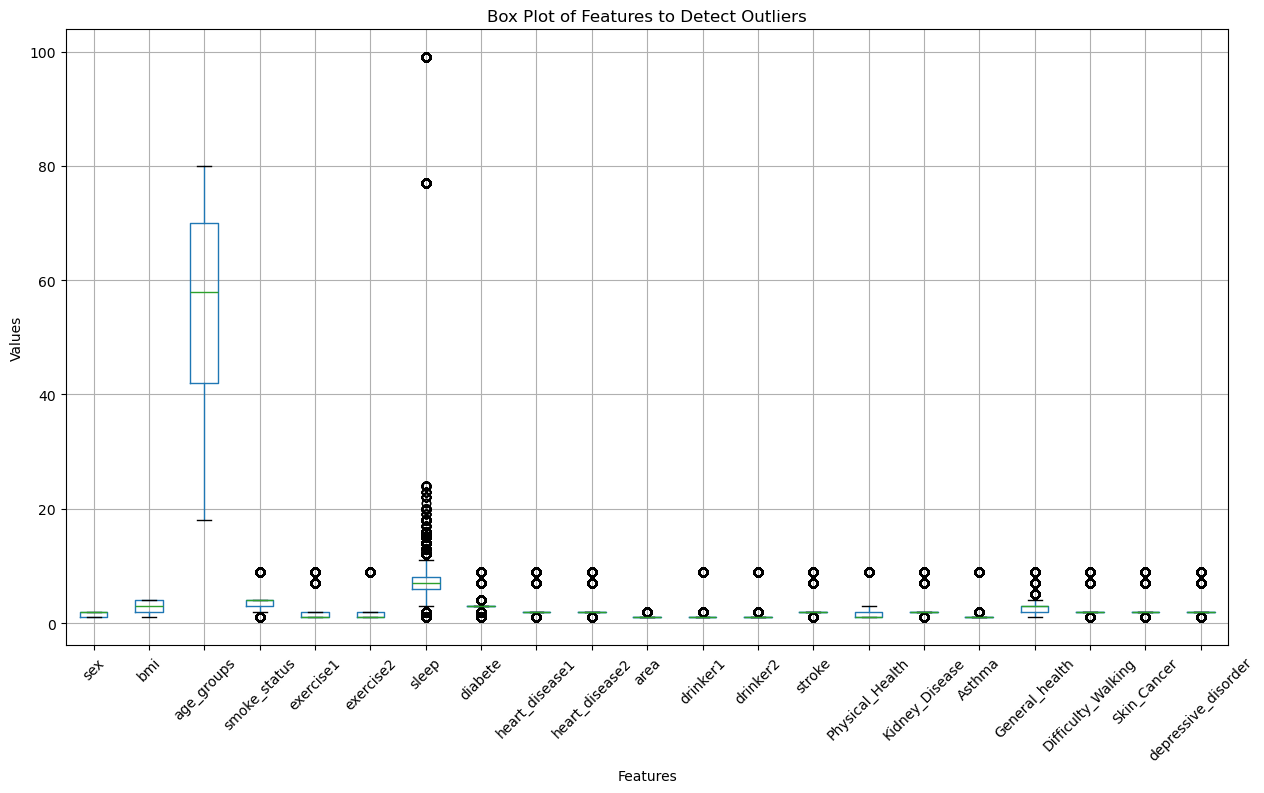

In [22]:
columns= df.columns

plt.figure(figsize=(15, 8))
df[columns].boxplot(rot=45)  # Rotate x labels for better readability
plt.title("Box Plot of Features to Detect Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Result: Most of the features have outliers and should be removed.

In [7]:
# Remove irrelevant values.

df = df.drop(df[df.bmi == -1].index)
df = df.drop(df[df.bmi > 4].index)
df = df.drop(df[df.smoke_status > 4].index)
df = df.drop(df[df.heart_disease1 > 2].index)
df = df.drop(df[df.heart_disease2 > 2].index)
df = df.drop(df[df.exercise1 > 2].index)
df = df.drop(df[df.exercise2 > 2].index)
df = df.drop(df[df.sleep > 14].index)
df = df.drop(df[df.diabete > 4].index)
df = df.drop(df[df.area == -1].index)
df = df.drop(df[df.drinker1 > 2].index)
df = df.drop(df[df.drinker2 > 2].index)
df = df.drop(df[df.stroke > 2].index)
#df = df.drop(df[df.Ecigarette > 2].index)
df = df.drop(df[df.Physical_Health > 3].index)
#df = df.drop(df[df.Mental_Health > 3].index)
df = df.drop(df[df.Kidney_Disease > 2].index)
df = df.drop(df[df.Asthma > 2].index)
df = df.drop(df[df.General_health > 5].index)
df = df.drop(df[df.Difficulty_Walking > 2].index)
df = df.drop(df[df.Skin_Cancer > 2].index)
df = df.drop(df[df.depressive_disorder>2].index)

# Replace 2 to 0,then false == 0
df.heart_disease1 = df.heart_disease1.replace(2, 0)
df.heart_disease2 = df.heart_disease2.replace(2, 0)

df['heart_disease'] = df['heart_disease1'] + df['heart_disease2']
# Replace 2 to 1, then heart problem.
df['heart_disease'] = df['heart_disease'].replace(2,1)

# Replace 2 to 0,then false == 0
df.drinker1 = df.drinker1.replace(2, 0)
df.drinker2 = df.drinker2.replace(2, 0)

df['drinker'] = df['drinker1'] + df['drinker2']
# Replace 2 to 1, then exercise.
df['drinker'] = df['drinker'].replace(2,1)

# Replace 2 to 0,then false == 0
df.exercise1 = df.exercise1.replace(2, 0)
df.exercise2 = df.exercise2.replace(2, 0)

df['exercise'] = df['exercise1'] + df['exercise2']
# Replace 2 to 1, then exercise.
df['exercise'] = df['exercise'].replace(2,1)

# valores 2 representam "não", substituindo por 0 para facilitar na plotagem.
df['stroke'] = df['stroke'].replace(2,0)


In [8]:
df.drop(columns=['heart_disease1', 'heart_disease2','exercise1', 'exercise2', 'drinker1', 'drinker2'], inplace=True)

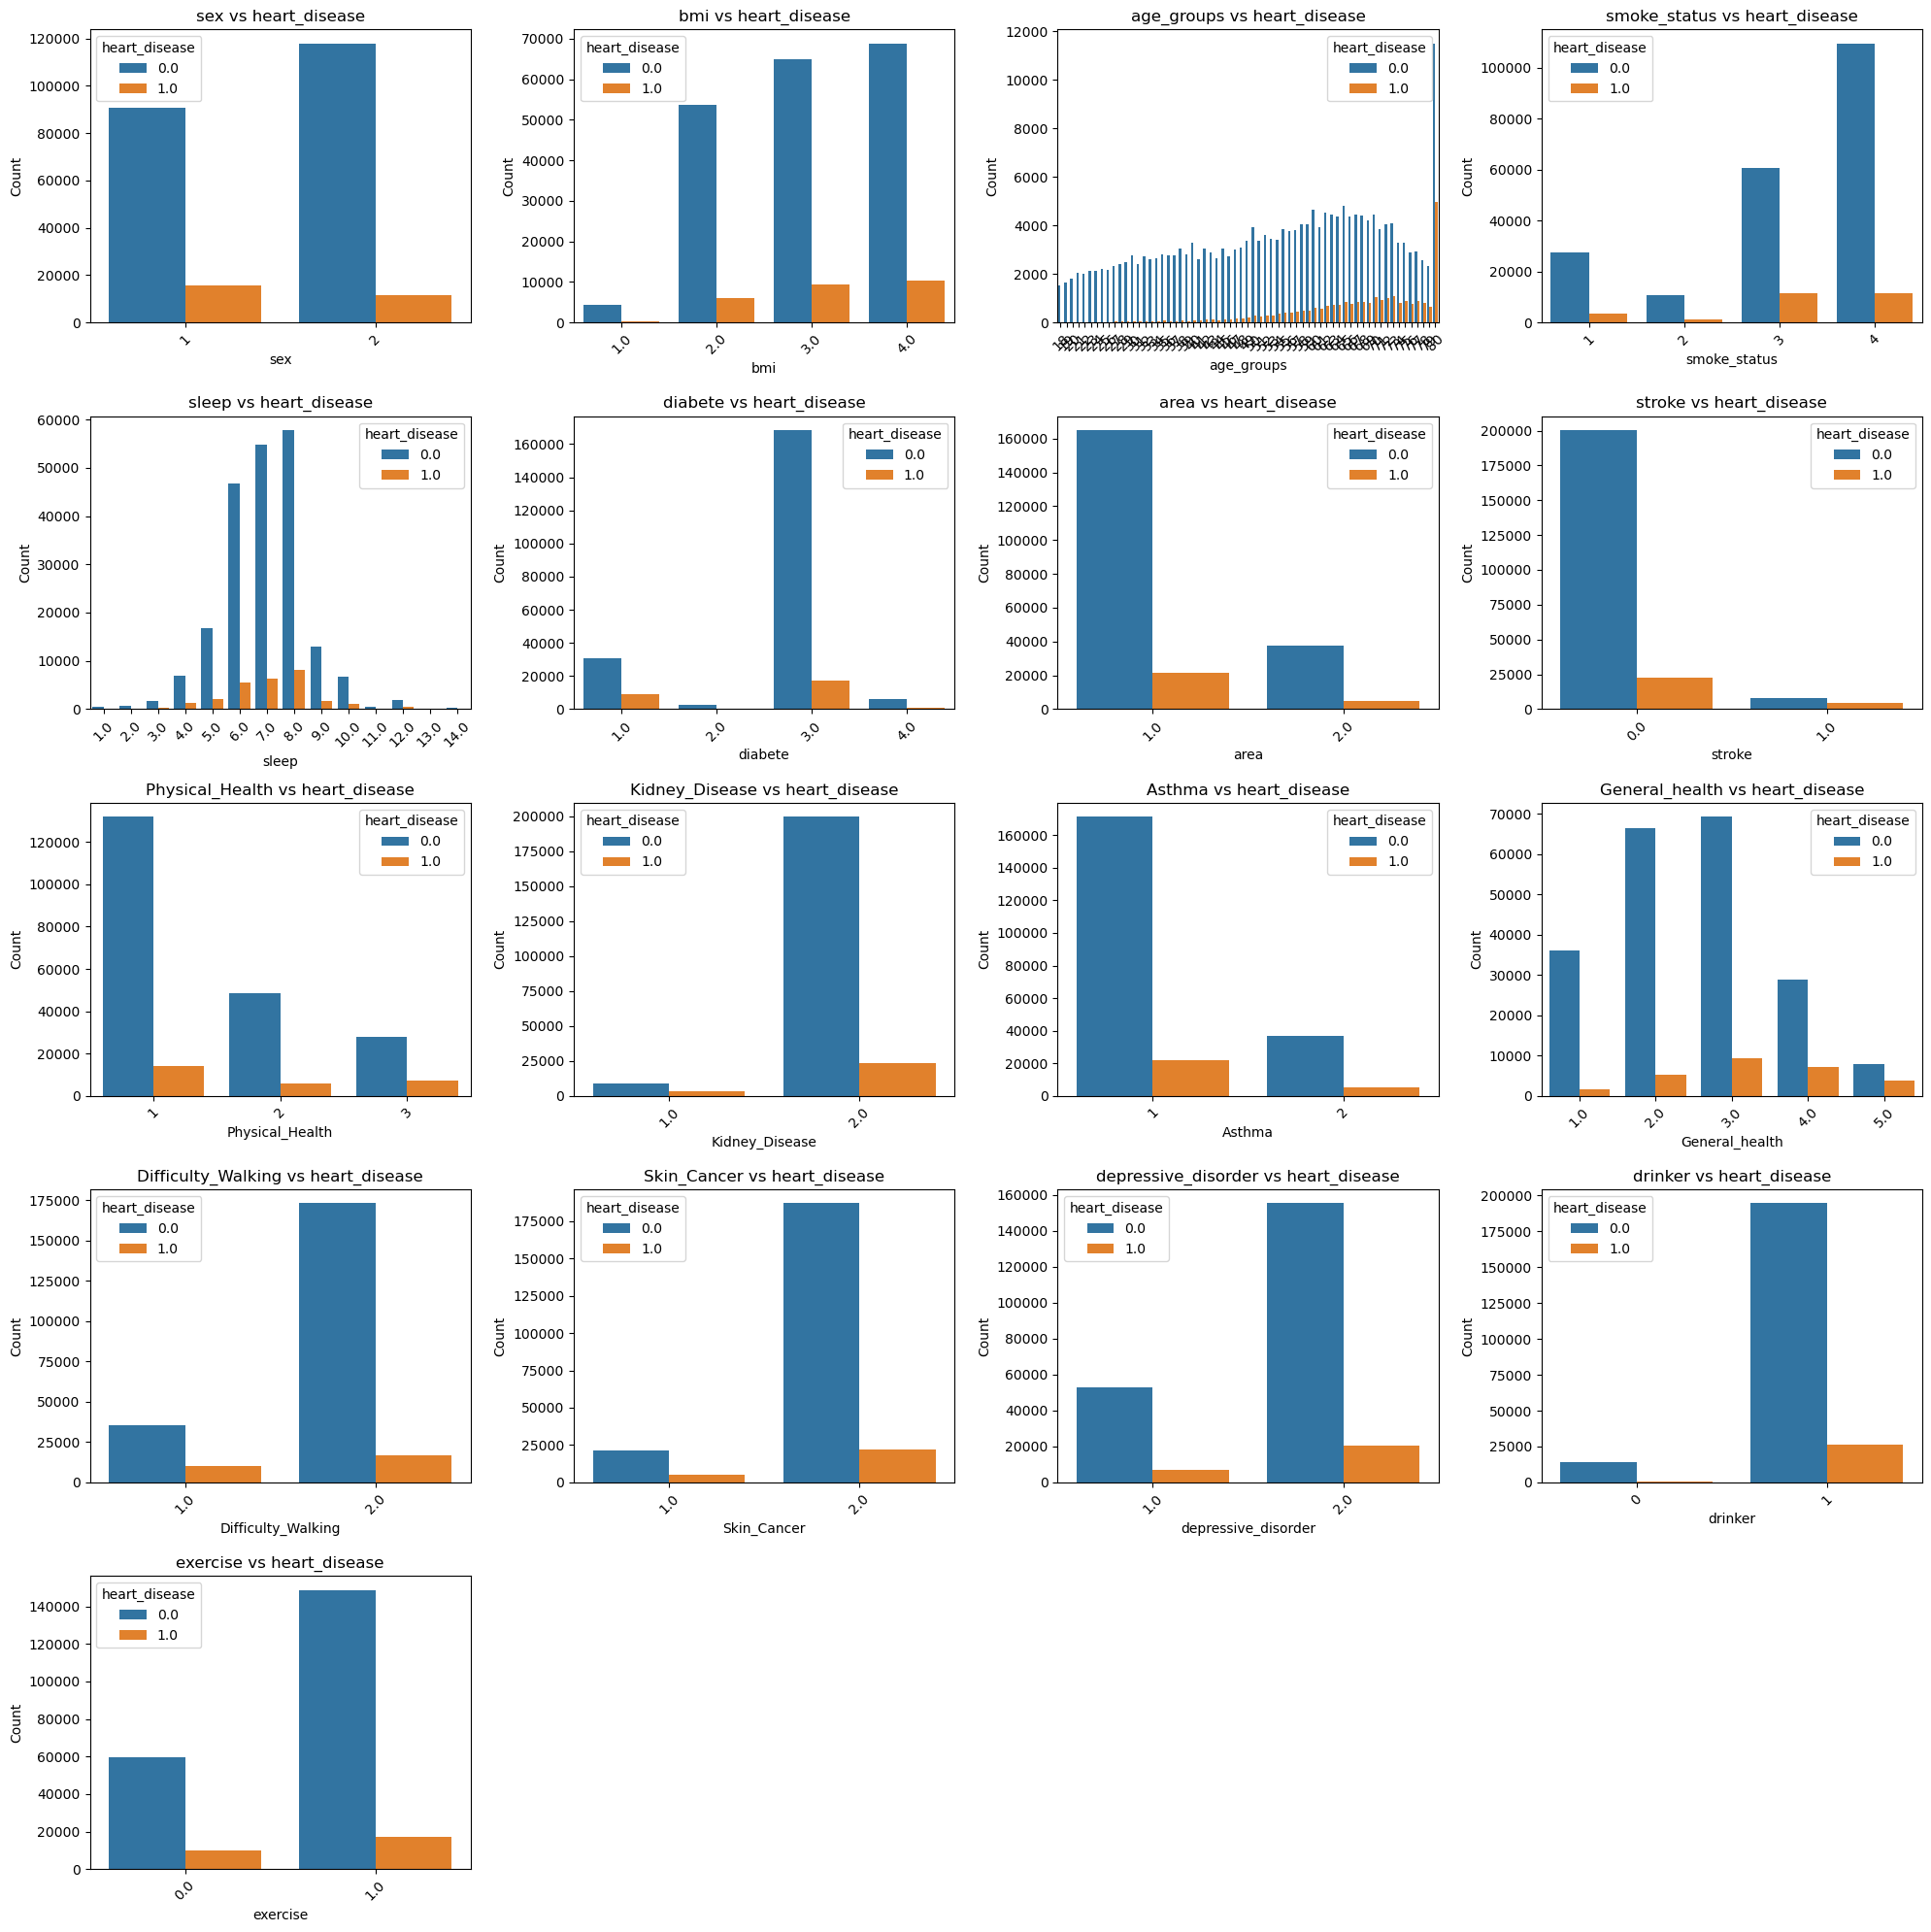

In [25]:
import math
target = 'heart_disease'

n_features = len(df.columns.drop('heart_disease'))
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))   # Create subplots
axes = axes.flatten()

for i, feature in enumerate(df.columns.drop('heart_disease')):                                     # Plot each feature
    sns.countplot(data=df, x=feature, hue=target, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='age_groups', ylabel='count'>

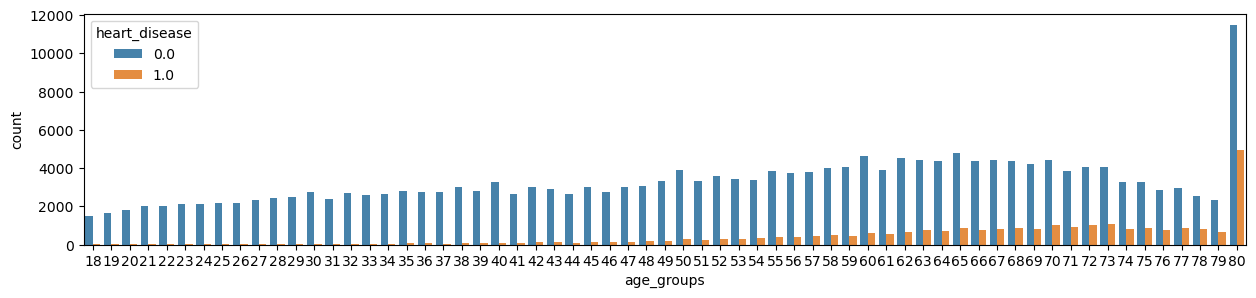

In [11]:
plt.figure(figsize = (15,3))
sns.countplot(x=df['age_groups'], hue=df['heart_disease'], alpha=0.9)

<Axes: xlabel='sleep', ylabel='count'>

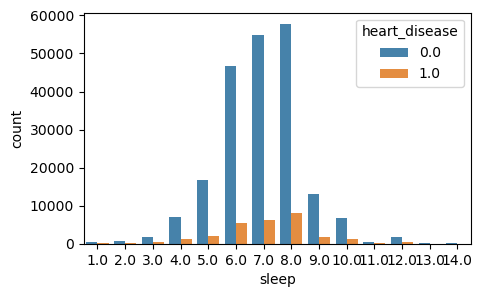

In [27]:

plt.figure(figsize = (5,3))
sns.countplot(x=df['sleep'], hue=df['heart_disease'], alpha=0.9)

In [14]:
count_data = df.groupby(['age_groups', 'heart_disease']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0
count_data['ratio_1_to_0'] = count_data[1] / count_data[0].replace(0, float('nan'))

# Optional: Round ratio for readability
count_data['ratio_1_to_0'] = count_data['ratio_1_to_0'].round(2)

# Rename columns for clarity
count_data = count_data.rename(columns={0: 'count_0', 1: 'count_1'})

# Display the table
#count_data.to_csv('heart_disease_ratio_table.csv', index=True)
count_data.head(63)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Heart Disease Ratio by Age Group", dataframe=count_data)

heart_disease,count_0,count_1,ratio_1_to_0
age_groups,,,
18,1523,22,0.01
19,1643,16,0.01
20,1793,23,0.01
21,2027,20,0.01
22,2001,20,0.01
...,...,...,...
76,2872,776,0.27
77,2941,895,0.30
78,2561,803,0.31


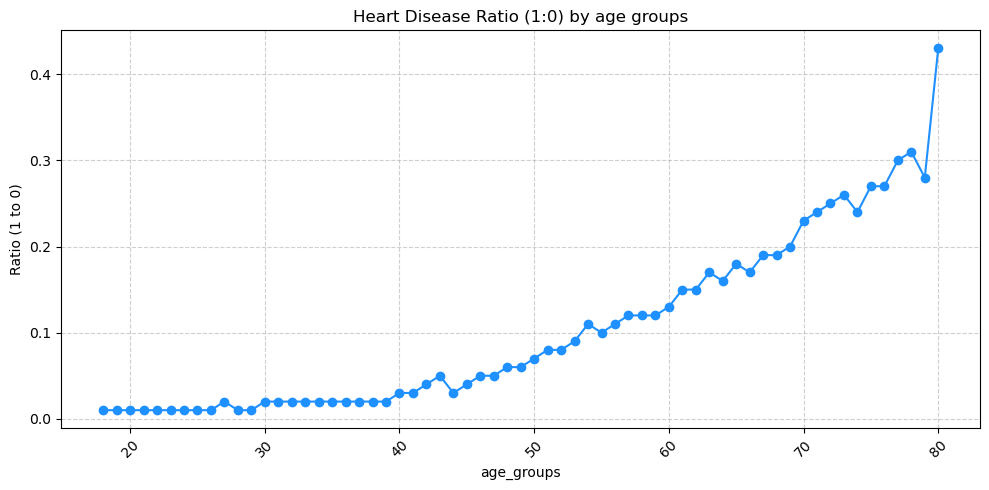

In [16]:
ratios = count_data['ratio_1_to_0']

# Plot as a line chart
plt.figure(figsize=(10, 5))
plt.plot(ratios.index, ratios.values, marker='o', linestyle='-', color='dodgerblue')

# Add labels and styling
plt.title('Heart Disease Ratio (1:0) by age groups')
plt.xlabel('age_groups')
plt.ylabel('Ratio (1 to 0)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
count_data = df.groupby(['sleep', 'heart_disease']).size().unstack(fill_value=0)

# Calculate the ratio of 1 to 0
count_data['ratio_1_to_0'] = count_data[1] / count_data[0].replace(0, float('nan'))

# Optional: Round ratio for readability
count_data['ratio_1_to_0'] = count_data['ratio_1_to_0'].round(2)

# Rename columns for clarity
count_data = count_data.rename(columns={0: 'count_0', 1: 'count_1'})

# Display the table
#count_data.to_csv('heart_disease_ratio_sleep.csv', index=True)
count_data.head(63)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Heart Disease Ratio by Age Group", dataframe=count_data)

heart_disease,count_0,count_1,ratio_1_to_0
sleep,,,
1.0,531,65,0.12
2.0,722,139,0.19
3.0,1785,361,0.20
4.0,6897,1203,0.17
5.0,16778,2102,0.13
6.0,46662,5473,0.12
7.0,54881,6267,0.11
8.0,57820,8175,0.14
9.0,12991,1671,0.13


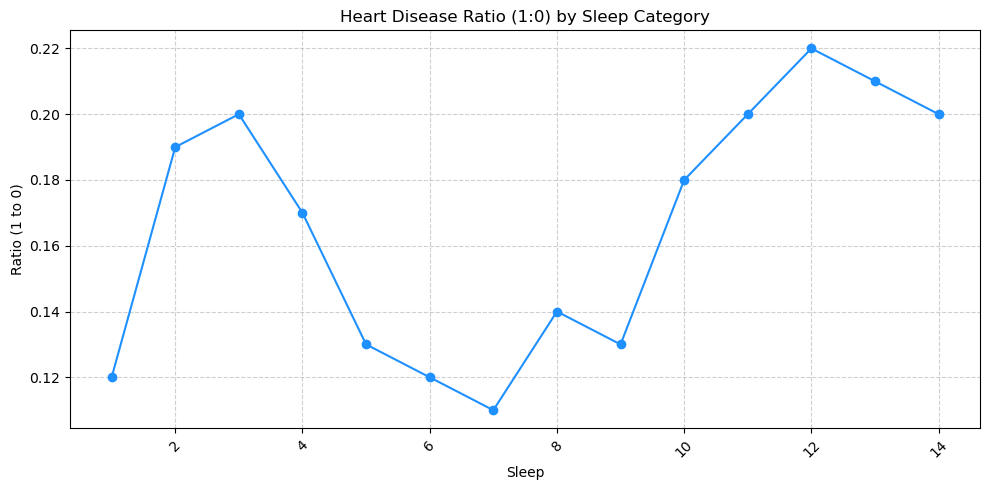

In [11]:
ratios = count_data['ratio_1_to_0']

# Plot as a line chart
plt.figure(figsize=(10, 5))
plt.plot(ratios.index, ratios.values, marker='o', linestyle='-', color='dodgerblue')

# Add labels and styling
plt.title('Heart Disease Ratio (1:0) by Sleep Category')
plt.xlabel('Sleep')
plt.ylabel('Ratio (1 to 0)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

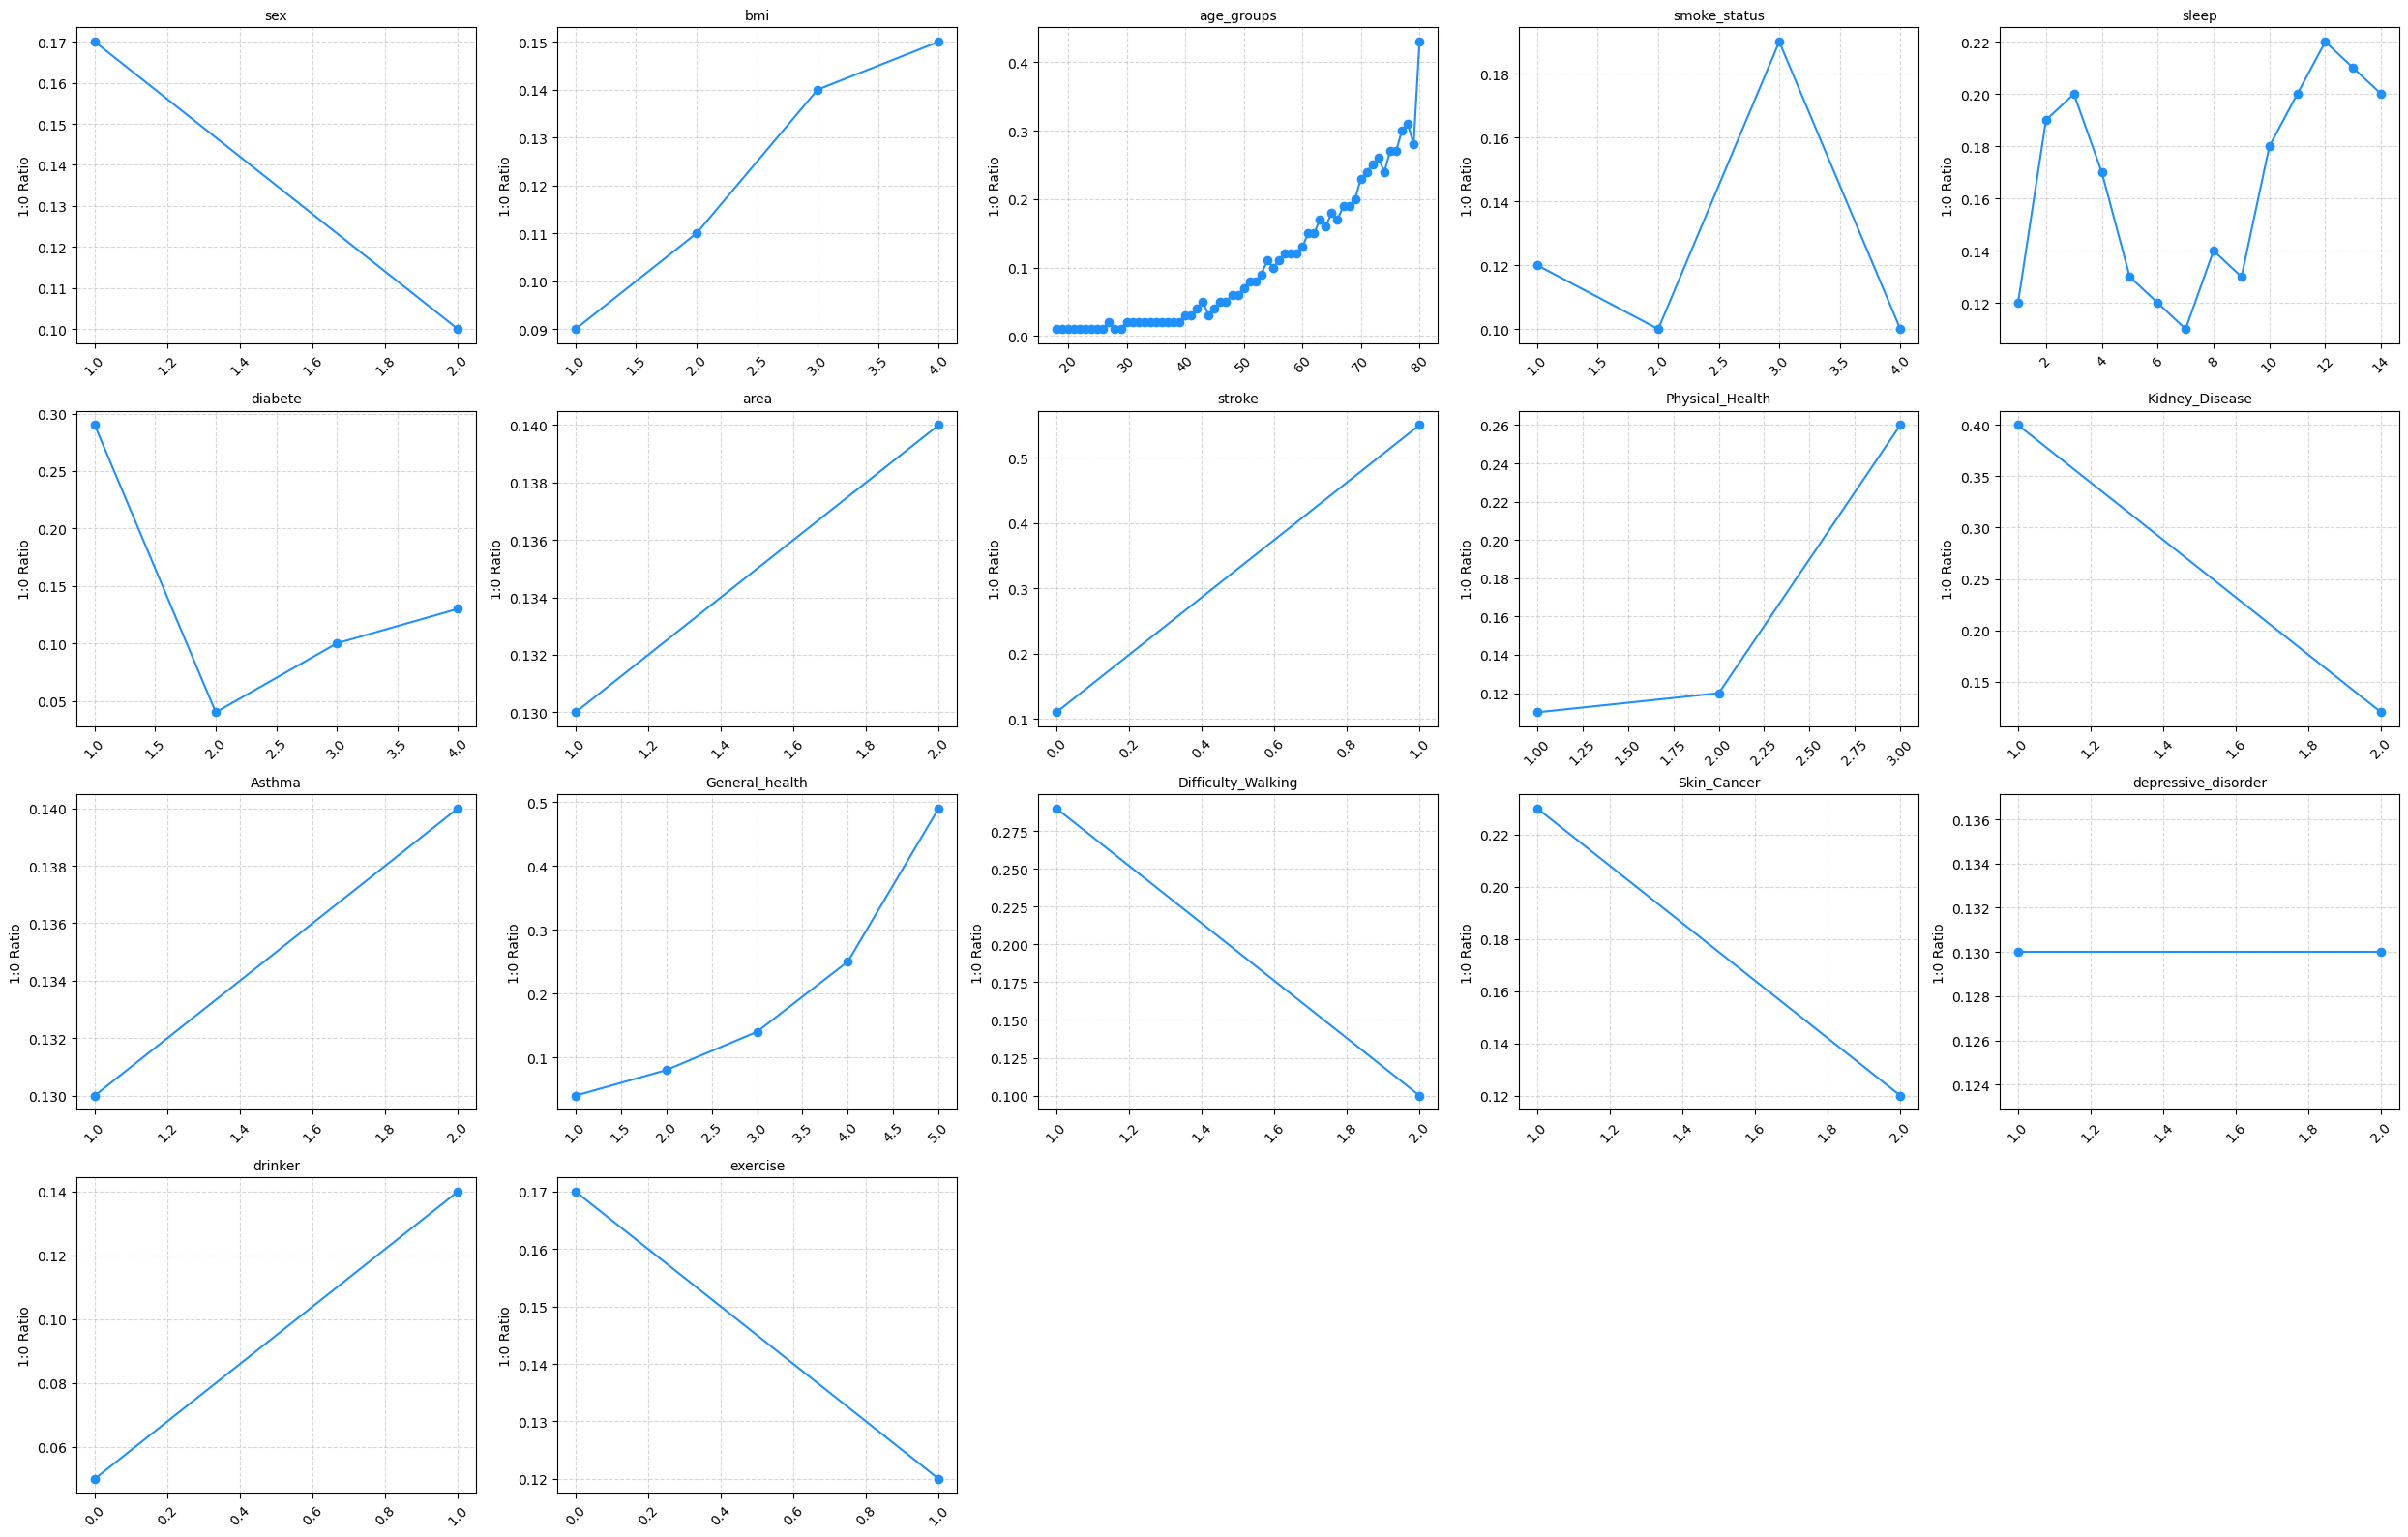

In [17]:
import math

target = 'heart_disease'

# List of all categorical features except the target
categorical_features = [col for col in df.columns if col != target]

# Define grid layout
n_features = len(categorical_features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

# Set up the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop over each categorical feature
for i, feature in enumerate(categorical_features):
    # Group and compute counts
    grouped = df.groupby([feature, target]).size().unstack(fill_value=0)
    
    # Skip feature if it has fewer than 2 unique target values
    if grouped.shape[1] < 2:
        continue

    # Rename columns
    grouped = grouped.rename(columns={0: 'count_0', 1: 'count_1'})

    # Compute ratio safely
    grouped['ratio_1_to_0'] = grouped['count_1'] / grouped['count_0'].replace(0, np.nan)
    grouped['ratio_1_to_0'] = grouped['ratio_1_to_0'].round(2)

    # Plot in the correct subplot
    ax = axes[i]
    ax.plot(grouped.index, grouped['ratio_1_to_0'], marker='o', linestyle='-', color='dodgerblue')
    ax.set_title(f'{feature}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('1:0 Ratio')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', rotation=45)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.3) Deleting and Handeling NAs

In [18]:
print(df.isna().sum())
#df=df.dropna()
df.shape

sex                        0
bmi                    17798
age_groups                 0
smoke_status               0
sleep                      0
diabete                    0
area                    6268
stroke                     0
Physical_Health            0
Kidney_Disease             0
Asthma                     0
General_health             3
Difficulty_Walking         1
Skin_Cancer                0
depressive_disorder        0
heart_disease              2
drinker                    0
exercise                   0
dtype: int64


(235592, 18)

In [19]:
for factor in df.columns:
    df[factor] = df[factor].fillna(df[factor].mode()[0])
print(df.isna().sum())

sex                    0
bmi                    0
age_groups             0
smoke_status           0
sleep                  0
diabete                0
area                   0
stroke                 0
Physical_Health        0
Kidney_Disease         0
Asthma                 0
General_health         0
Difficulty_Walking     0
Skin_Cancer            0
depressive_disorder    0
heart_disease          0
drinker                0
exercise               0
dtype: int64


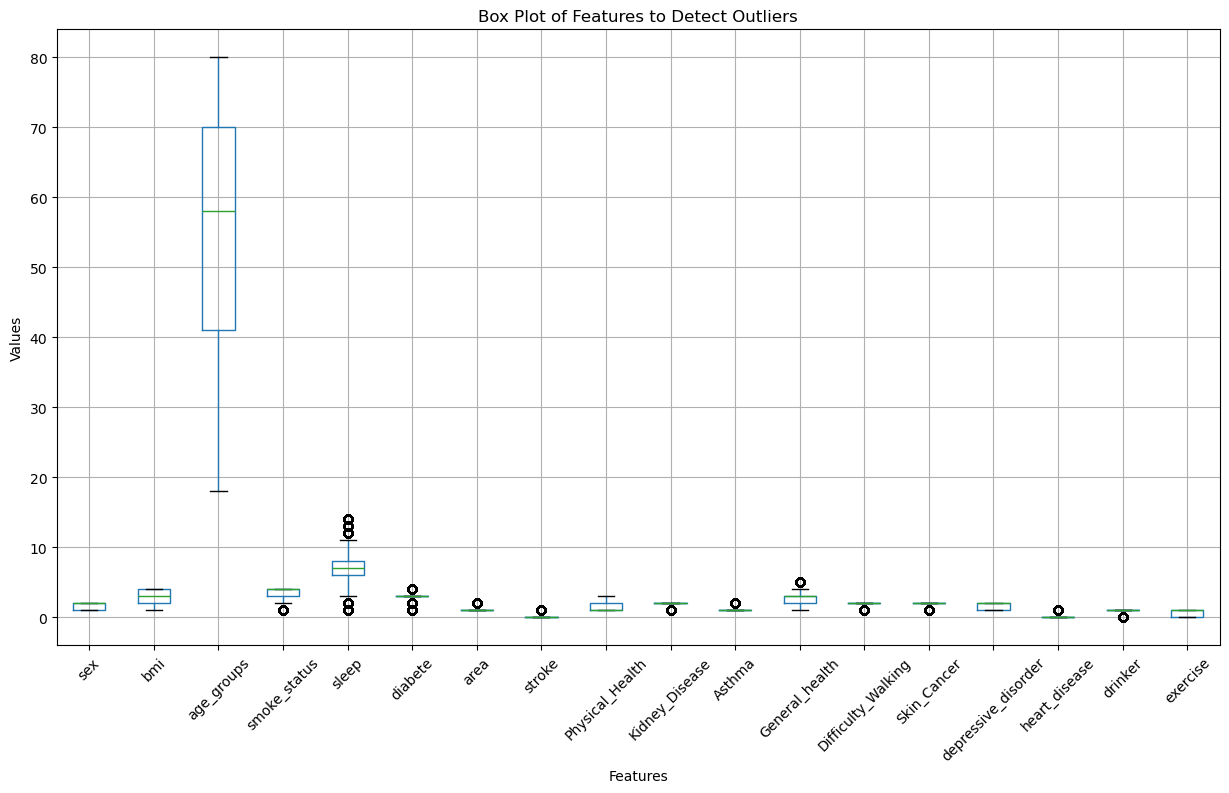

In [28]:
#columns= df.columns
existing_features = [col for col in df.columns]

plt.figure(figsize=(15, 8))
df[df.columns].boxplot(rot=45)  # Rotate x labels for better readability
plt.title("Box Plot of Features to Detect Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [29]:
df = df.astype(int)

### 2.4) Feature Engineering

**Corrolation**

In [31]:
corr_matrix=df.corr()
corr_matrix["heart_disease"].sort_values(ascending=False).head(30)

heart_disease          1.000000
age_groups             0.253321
General_health         0.207377
stroke                 0.176796
Physical_Health        0.108371
drinker                0.053290
bmi                    0.024932
sleep                  0.013241
Asthma                 0.008375
area                   0.005504
depressive_disorder    0.003951
smoke_status          -0.025479
exercise              -0.058707
Skin_Cancer           -0.079312
sex                   -0.088034
Kidney_Disease        -0.125228
diabete               -0.148126
Difficulty_Walking    -0.164946
Name: heart_disease, dtype: float64

Result: The result of applying the corrolation function to data set shows that "heart_desease" and "General_health" are the most positively correlated features and "Difficulty_walking" and "Diabete" are the most negatively corrolated ones to the target feature.

**Backward Elimination**

In [20]:
column = df.columns.drop("heart_disease")
X = df[column]  # Features
y = df['heart_disease']
#X_norm = pd.DataFrame(X, columns=df.columns.drop("heart_disease"))
#df_norm['heart_disease'] = y.values

In [30]:
import statsmodels.api as sm

def backward_elimination(data, target, significance_level=0.05):
    variables = data.columns.tolist()
    while len(variables) > 0:
        X_with_const = sm.add_constant(data[variables])
        model = sm.OLS(target, X_with_const).fit()
        max_p_value = model.pvalues.iloc[1:].max()
        if max_p_value > significance_level:
            excluded_var = model.pvalues.iloc[1:].idxmax()
            print(f"Removing {excluded_var} with p-value {max_p_value}")
            variables.remove(excluded_var)
        else:
            break
    return model

# Apply backward elimination
final_model_backward = backward_elimination(X, y)
print("\nFinal Model Summary (Backward Elimination):\n", final_model_backward.summary())

Removing depressive_disorder with p-value 0.7429922385488095
Removing sleep with p-value 0.4593967259422641
Removing area with p-value 0.15021700702425358

Final Model Summary (Backward Elimination):
                             OLS Regression Results                            
Dep. Variable:          heart_disease   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2417.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:50:21   Log-Likelihood:                -49682.
No. Observations:              235592   AIC:                         9.939e+04
Df Residuals:                  235577   BIC:                         9.955e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
         

In [33]:

df = df.drop(['depressive_disorder'],axis=1)
df = df.drop(['sleep'],axis=1)
df = df.drop(['area'],axis=1)

### 2.5) Handeling unbalenced dataset

In [34]:
df['heart_disease'].value_counts(normalize=True) * 100

heart_disease
0    88.458861
1    11.541139
Name: proportion, dtype: float64

The ratio of the valuse of the target feature is 88% (0) to 12%(1). This huge unbalancing should be addressed. We considerd 3 different method and slected one of them that give us better results regarding accuracy and ....

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resa, y_resa = rus.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resa, columns=X.columns)
df_resampled['heart_disease'] = y_resa.values

In [36]:
from imblearn.over_sampling import SMOTE
column = df.columns.drop("heart_disease")
X = df[column]  # Features
y = df['heart_disease']
#X = df_norm.drop(columns=['heart_disease'])  # Features
#y = df_norm['heart_disease']  # Target column

smote = SMOTE(random_state=42)
X_resa, y_resa = smote.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resa, columns=X.columns)
df_resampled['heart_disease'] = y_resa.values

In [37]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Define a pipeline
sampling_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.3, random_state=42)),  # Increase 1s to 30% of total
    ('under', RandomUnderSampler(sampling_strategy="auto", random_state=42))  # Reduce 0s to balance
])

#X = df_norm.drop(columns=['heart_disease'])  # Features
#y = df_norm['heart_disease']  # Target column

X_resa, y_resa = sampling_pipeline.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resa, columns=X.columns)
df_resampled['heart_disease'] = y_resa.values

The result showes that the SMOTE method is the best to apply balancing to the data.

In [38]:
y_resa.value_counts(normalize=True) * 100

heart_disease
0    50.0
1    50.0
Name: proportion, dtype: float64

Now the target values are balanced.

## 3) Models evaluation, including testing options, exploring algorithms, and reporting results

Dividing data into test and train data.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resa,y_resa, test_size=0.2, random_state=40)

### 3.1) Applying Decision Tree algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy train: 91.22%
Accuracy test: 74.46%
Recall: 76.88%
sensitivity: 76.88%
specificity: 72.04%
Precision: 73.27%
F1-Score: 75.03%


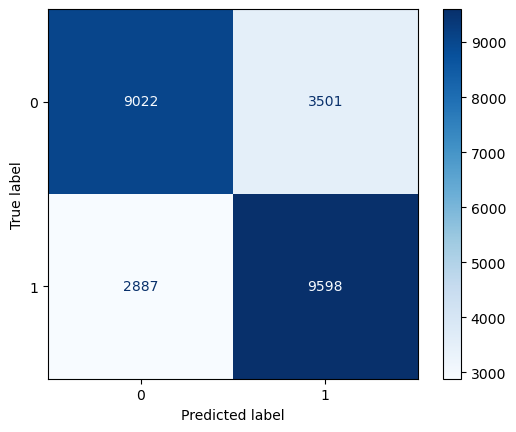

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.2)  Applying Gaussion-Naive Bays algorithm

In [42]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Accuracy train: 68.43%
Accuracy test: 68.19%
Recall: 62.47%
sensitivity: 62.47%
specificity: 73.89%
Precision: 70.46%
F1-Score: 66.23%


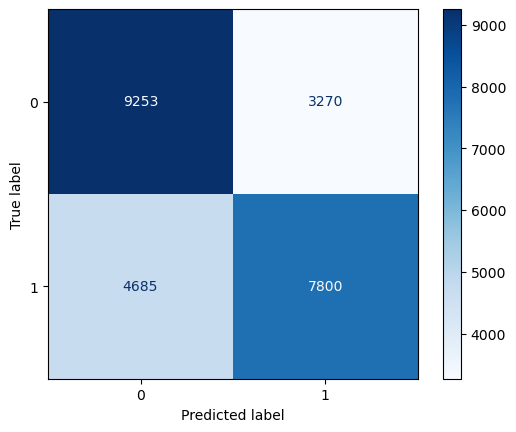

In [43]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.3)  Applying Bernuli-Naive Bays algorithm

In [44]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

Accuracy train: 57.47%
Accuracy test: 57.29%
Recall: 44.53%
sensitivity: 44.53%
specificity: 70.02%
Precision: 59.69%
F1-Score: 51.01%


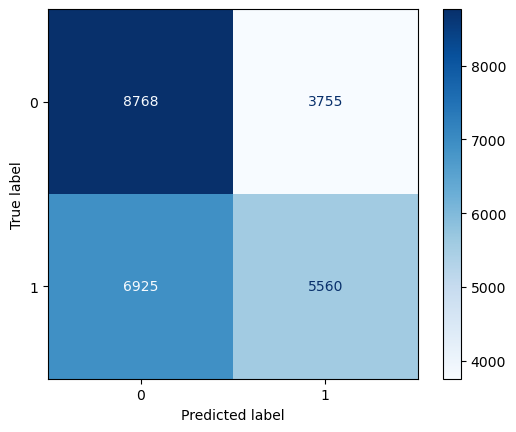

In [45]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.4)  Applying XGB-Classifier algorithm

In [46]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=9)  # Ratio of majority/minority class
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy train: 63.83%
Accuracy test: 63.17%
Recall: 98.37%
sensitivity: 98.37%
specificity: 28.07%
Precision: 57.69%
F1-Score: 72.73%


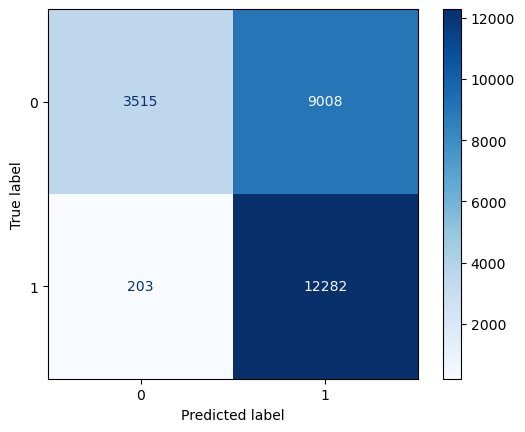

In [47]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.5)  Applying Random Forest algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy train: 91.22%
Accuracy test: 76.44%
Recall: 81.13%
sensitivity: 81.13%
specificity: 71.76%
Precision: 74.12%
F1-Score: 77.47%


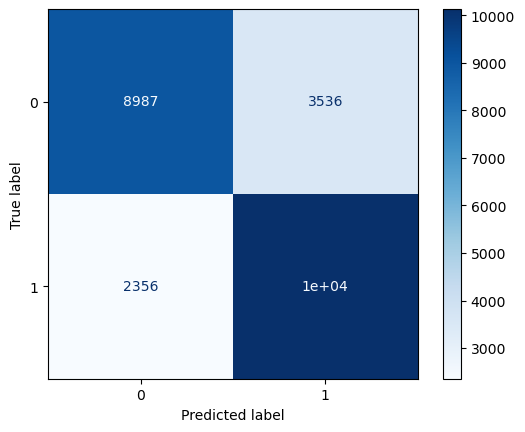

In [49]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.6)  Applying Logistic Regression algorithm

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

Accuracy train: 73.34%
Accuracy test: 73.50%
Recall: 76.40%
sensitivity: 76.40%
specificity: 70.62%
Precision: 72.16%
F1-Score: 74.22%


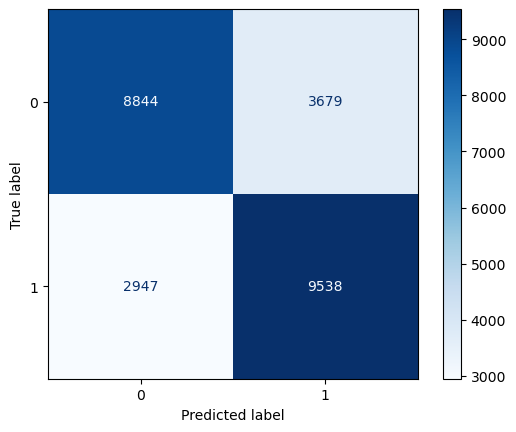

In [51]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.7)  Applying KNN algorithm

In [52]:
from sklearn.neighbors import KNeighborsClassifier   
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Accuracy train: 82.72%
Accuracy test: 73.54%
Recall: 70.17%
sensitivity: 70.17%
specificity: 76.89%
Precision: 75.17%
F1-Score: 72.58%


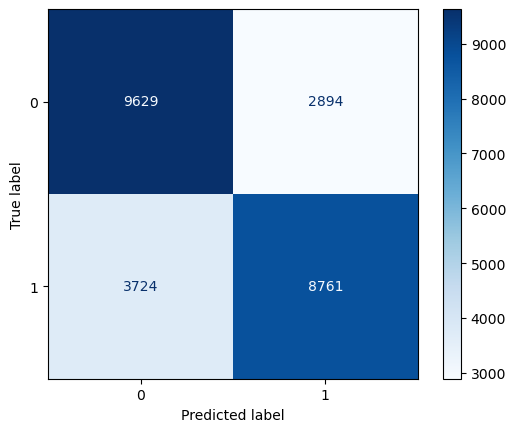

In [53]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.8)  Applying SVM algorithm

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

Accuracy train: 73.80%
Accuracy test: 73.49%
Recall: 77.86%
sensitivity: 77.86%
specificity: 69.10%
Precision: 71.72%
F1-Score: 74.66%


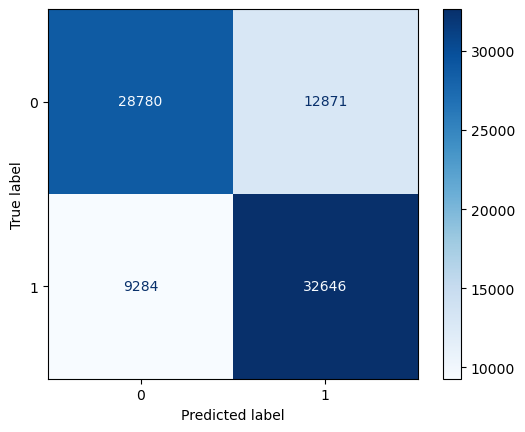

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### 3.8)  Applying KNN algorithm with optimal N_neighbors

**Finding optimal K value.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier       # k-nearest neighbors (kNN) classifier
from sklearn.model_selection import cross_val_score

In [ ]:
k_values = range(1, 20)
cv_scores = []           # stores the mean cross-validation scores for each value of k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)               # n_neighbors default = 5
    scores = cross_val_score(knn, X_train, y_train, cv=5)   # 5-fold cross-validation
    cv_scores.append(scores.mean())

In [ ]:
print(list(k_values))
print(scores)
print(cv_scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.77921184 0.77825469 0.7805728  0.77884961 0.78003111]
[0.7865088568973206, 0.7718493766937116, 0.7962688827819077, 0.7944682235908116, 0.7969867524140807, 0.7980007432393297, 0.7937503592372634, 0.7955390467755413, 0.7907951327303069, 0.7931311989061545, 0.7882018343328813, 0.7902567305732782, 0.7857012553393067, 0.7868498485938289, 0.7830331779735618, 0.7845526666923976, 0.7817380201653134, 0.7830152314989253, 0.7793840092147255]


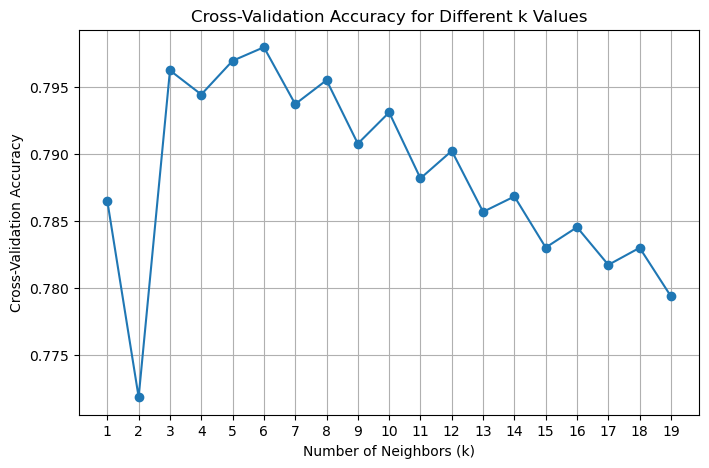

Optimal k value: 6


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xticks(k_values)
plt.grid()
plt.show()

# Best k
best_k = k_values[np.argmax(cv_scores)]
print("Optimal k value:", best_k)

**Traning the model.**

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Accuracy train: 84.66%
Accuracy test: 80.35%
Recall: 84.15%
sensitivity: 84.15%
specificity: 76.53%
Precision: 78.30%
F1-Score: 81.12%


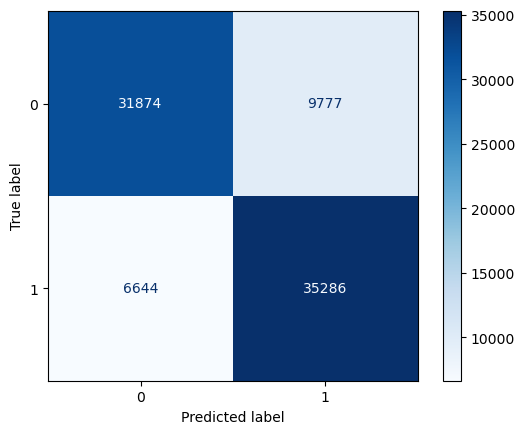

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100  # Convert to %
recall = recall_score(y_test, y_pred_test) * 100  # Sensitivity / True Positive Rate
precision = precision_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

sensitivity = recall_score(y_test, y_pred_test, pos_label=1)* 100 # Sensitivity for heart disease

specificity = recall_score(y_test, y_pred_test, pos_label=0)* 100  # Specificity for not heart disease

# Print results
print(f"Accuracy train: {accuracy_train:.2f}%")
print(f"Accuracy test: {accuracy_test:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"sensitivity: {sensitivity:.2f}%")
print(f"specificity: {specificity:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"F1-Score: {f1:.2f}%")
display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)